
AUTOR: Robert Benassai Dalmau

Aquest programa simula la teoria de variables ocultes amb un fotó d'angle aleatori i uns polaritzadors amb angles alpha i beta. També calcula la S de la desigualtat de Bell.

In [1]:
def rho(photon,alpha,beta):
    #fem passar el fotó pels polaritzadors
    detector1=0
    detector2=0
    photon = photon%(math.pi)
    alpha = alpha%(math.pi)
    beta = beta%(math.pi)
    if abs(alpha-photon)<=(math.pi/4) or abs(alpha-photon)>(3*math.pi/4):#si passa pel primer pol
        detector1=1
    if abs(beta-photon)<=(math.pi/4) or abs(beta-photon)>(3*math.pi/4):#si passa pel segon
        detector2=1
    detectors=[detector1,detector2]
    return(detectors)
def rho2(photon,alpha,beta):
    detector1=0
    detector2=0
    photon = photon%(math.pi)
    alpha = alpha%(math.pi)
    beta = beta%(math.pi)
    if random.uniform(0, 1) < math.cos(alpha-photon)**2:
        detector1 = 1
    if random.uniform(0, 1) < math.cos(beta-photon)**2:
        detector2 = 1
    detectors=[detector1,detector2]
    return(detectors)

In [2]:
import random
import math
#creem les llistes dels angles que posarem als polaritzadors
pol1=[-math.pi/4,0,math.pi/4,math.pi/2]
pol2=[-math.pi/8,math.pi/8,3*math.pi/8,5*math.pi/8]
table1=[]
random.seed(1000)
for alpha in pol1:
    for beta in pol2:
#nombre total de fotons tirats, vertical-vertical, VH...
        N=100000
        VV=0
        HH=0
        HV=0
        VH=0
        for i in range(1,N):
        #fotó de polarització aleatòria entre [-pi,pi]
            photon=random.uniform(-math.pi,math.pi)#ha de ser entre -pi i pi perquè si no el alpha=-45 no pilla cap al detector1
            
        #fem passar el fotó pels polaritzadors
            detectors=rho(photon,alpha,beta)#funció de distribució de probabilitat
            detector1=detectors[0]
            detector2=detectors[1]
        #organitzem els resultats per VV, VH, HV, HH
            if detector1==1 and detector2==1:
                VV=VV+1
            elif detector1==1 and detector2==0:
                VH=VH+1
            elif detector1==0 and detector2==1:
                HV=HV+1
            elif detector1==0 and detector2==0:
                HH=HH+1
            else:
                print('error',detector1,detector2)
                
# [angle del pol1, angle pol2, deteccions detector 1, deteccions detector 2, Entrellaçats (detectats VV)]
        resultats=[alpha,beta,VH+VV,HV+VV,VV]
        table1.append(resultats)
        resultats=[]
for i in table1:
    print(i)
            

[-0.7853981633974483, -0.39269908169872414, 50022, 50038, 37518]
[-0.7853981633974483, 0.39269908169872414, 49716, 50336, 12440]
[-0.7853981633974483, 1.1780972450961724, 49944, 49960, 12444]
[-0.7853981633974483, 1.9634954084936207, 50110, 50051, 37652]
[0, -0.39269908169872414, 50033, 50189, 37670]
[0, 0.39269908169872414, 49926, 50076, 37422]
[0, 1.1780972450961724, 50036, 49932, 12438]
[0, 1.9634954084936207, 49956, 49843, 12393]
[0.7853981633974483, -0.39269908169872414, 49741, 50183, 12419]
[0.7853981633974483, 0.39269908169872414, 49999, 50127, 37507]
[0.7853981633974483, 1.1780972450961724, 50155, 50235, 37590]
[0.7853981633974483, 1.9634954084936207, 50129, 49939, 12591]
[1.5707963267948966, -0.39269908169872414, 49797, 50310, 12530]
[1.5707963267948966, 0.39269908169872414, 50001, 49997, 12464]
[1.5707963267948966, 1.1780972450961724, 49823, 49820, 37413]
[1.5707963267948966, 1.9634954084936207, 49979, 50183, 37548]


Amb aquestes dades calculem la S desigualtat de Bell:

In [3]:
Elist=[]
#Nc=llista de coincidències, agafa la última columna de la taula
Nc=[]
for result in table1:
    Nc.append(result[4])
#posicions en la llista de coincidències de E(alpha,beta). Ho faig així perquè segueixen un patró.
posab=[0,1,4,5]
for i in posab:
    #calcula la E segons la posició de E(alpha,beta) de la llista de coincidències
    E=(Nc[i]+Nc[i+10]-Nc[i+2]-Nc[i+8])/(Nc[i]+Nc[i+10]+Nc[i+2]+Nc[i+8])
    Elist.append(E)
#Agafem els angles a=-45, a'=0 i b=22.5, b'=-22.5
#print(Elist)
S=Elist[0]-Elist[1]+Elist[2]+Elist[3]

print('S=',abs(S))


S= 2.0058181280711973


Test del càlcul de S amb les dades de la TABLE 1 del paper

In [4]:
Elist=[]
#Nc=llista de coincidències, agafa la última fila de la taula
Nc=[842,212,302,836,891,869,173,261,255,830,814,221,170,259,969,846]
#posicions en la llista de coincidències de E(alpha,beta). Ho faig així perquè segueixen un patró.
posab=[0,1,4,5]
for i in posab:
    #calcula la E segons la posició de E(alpha,beta) de la llista de coincidències
    E=(Nc[i]+Nc[i+10]-Nc[i+2]-Nc[i+8])/(Nc[i]+Nc[i+10]+Nc[i+2]+Nc[i+8])
    Elist.append(E)
#Agafem els angles a=-45, a'=0 i b=22.5, b'=-22.5
#print(Elist)
S=Elist[0]-Elist[1]+Elist[2]+Elist[3]

print('S=',abs(S))

            

S= 2.3073155785321418


Surt el que els hi dona al paper (dades reals)


In [5]:
(-math.pi/2)%math.pi
    

1.5707963267948966

### Experiment quàntic

In [6]:
import math

def verticals(alpha, beta, thetal,phi):
    #prob VV
    verticals=math.sin(alpha)**2*math.sin(beta)**2*math.cos(thetal)**2+math.cos(alpha)**2*math.cos(beta)**2 \
    *math.sin(thetal)**2+(1/4)*math.sin(2*alpha)*math.sin(2*beta)*math.sin(2*thetal)*math.cos(phi)
    return(verticals)

def crossed(alpha, beta, thetal,phi):
    #prob HV o VH
    Pcrossed=math.sin(alpha)**2*math.cos(beta)**2*math.cos(thetal)**2-(1/4)*math.sin(2*alpha)*math.sin(2*beta)*\
    math.sin(2*thetal)*math.cos(phi)+math.cos(alpha)**2*math.sin(beta)**2*math.sin(thetal)**2
    return(Pcrossed)

def horizontals(alpha, beta, thetal,phi):
    Phh=math.cos(alpha)**2*math.cos(beta)**2*math.cos(thetal)**2+math.sin(alpha)**2*math.sin(beta)**2*math.sin(thetal)**2+\
    (1/4)*math.sin(2*alpha)*math.sin(2*beta)*math.sin(2*thetal)*math.cos(phi)
    return(Phh)

In [7]:
import math

def expqua(photons,alpha, beta, thetal,phi):
    #creem les llistes dels angles que posarem als polaritzadors per poder calcular S
    #fem que els angles estiguin entre -pi i pi
    pol1=[]
    pol2=[]
    for i in range(0,4):
        if (alpha+i*math.pi/4)>math.pi:
            pol1.append(alpha+i*math.pi/4-2*math.pi)
        else:
            pol1.append(alpha+i*math.pi/4)
    for i in range(0,4):
        if beta+i*math.pi/4>math.pi:
            pol2.append(beta+i*math.pi/4-2*math.pi)
        else:
            pol2.append(beta+i*math.pi/4)     
    table1=[]
    for a1 in pol1:
        for b1 in pol2:
            
            VV=int(verticals(a1,b1,thetal,phi)*photons)
            VH=int(crossed(a1,b1,thetal,phi)*photons)
            HV=int(crossed(b1,a1,thetal,phi)*photons)#simplement canviar alpha per beta i viceversa
            
            resultats=[a1,b1,VH,HV,VV]
            table1.append(resultats)
            resultats=[]
    
    return(table1)

In [8]:
table1=expqua(81000,-math.pi/4,-math.pi/8,math.pi/4,26*math.pi/180)
for i in table1:
    print(i)

[-0.7853981633974483, -0.39269908169872414, 7380, 7380, 33119]
[-0.7853981633974483, 0.39269908169872414, 33119, 33119, 7380]
[-0.7853981633974483, 1.1780972450961724, 33119, 33119, 7380]
[-0.7853981633974483, 1.9634954084936207, 7380, 7380, 33119]
[0.0, -0.39269908169872414, 5931, 5931, 34568]
[0.0, 0.39269908169872414, 5931, 5931, 34568]
[0.0, 1.1780972450961724, 34568, 34568, 5931]
[0.0, 1.9634954084936207, 34568, 34568, 5931]
[0.7853981633974483, -0.39269908169872414, 33119, 33119, 7380]
[0.7853981633974483, 0.39269908169872414, 7380, 7380, 33119]
[0.7853981633974483, 1.1780972450961724, 7380, 7380, 33119]
[0.7853981633974483, 1.9634954084936207, 33119, 33119, 7380]
[1.5707963267948966, -0.39269908169872414, 34568, 34568, 5931]
[1.5707963267948966, 0.39269908169872414, 34568, 34568, 5931]
[1.5707963267948966, 1.1780972450961724, 5931, 5931, 34568]
[1.5707963267948966, 1.9634954084936207, 5931, 5931, 34568]


In [9]:
def scalc(table1):
    Elist=[]
    #Nc=llista de coincidències, agafa la última columna de la taula
    Nc=[]
    for result in table1:
        Nc.append(result[4])
    #posicions en la llista de coincidències de E(alpha,beta). Ho faig així perquè segueixen un patró.
    posab=[0,1,4,5]
    for i in posab:
        #calcula la E segons la posició de E(alpha,beta) de la llista de coincidències
        E=(Nc[i]+Nc[i+10]-Nc[i+2]-Nc[i+8])/(Nc[i]+Nc[i+10]+Nc[i+2]+Nc[i+8])
        Elist.append(E)
    #Agafem els angles a=-45, a'=0 i b=22.5, b'=-22.5
    #print(Elist)
    S=Elist[0]-Elist[1]+Elist[2]+Elist[3]

    return(S)


In [11]:
scalc(table1)

2.6853008716264597

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import csv

def sweepS(b1,b2,photons,thetal,phi):
    res=[]
    #we take the lowest of b1 and b2
    angle=0
    alphalist=np.linspace(0,2*np.pi,200)
    if b1>b2:
        angle1=b2
        angle2=b1
    else:
        angle1=b1
        angle2=b2
    #WARNING: max beta linspace points ~ 50
    betalist=np.linspace(angle1,angle2,50)
    for beta in betalist:
        for alpha in alphalist:
            table=expqua(photons,alpha, beta, thetal,phi)
            S=scalc(table)
            res.append([alpha,beta,S])
    
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    with open('sweep.csv','w',newline='') as sweepfile:
        wr=csv.writer(sweepfile)
        for k in res:
            wr.writerow(k)
    sweepfile.close()
    DataAll1D = np.loadtxt("sweep.csv", delimiter=",")

    # create 2d x,y grid (both X and Y will be 2d)
    X, Y = np.meshgrid(DataAll1D[:,0], DataAll1D[:,1])
    # repeat Z to make it a 2d grid
    Z = np.tile(DataAll1D[:,2], (len(DataAll1D[:,2]), 1))
    mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet)
    mappable.set_array(Z)
    fig = plt.figure()
    ax = Axes3D(fig)
    surf=ax.plot_surface(X, Y, Z, cmap=mappable.cmap, linewidth=0.01)
    fig.colorbar(mappable)
    plt.savefig('test.pdf')
    plt.show()
        #return(Sdict)
            
        

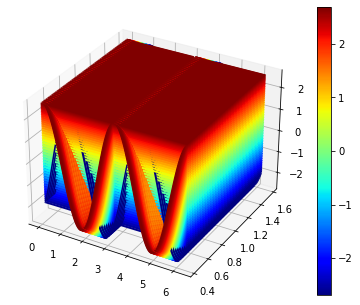

In [27]:
sweepS(5*math.pi/36,math.pi/2,40000,math.pi/4,26*math.pi/180)

In [ ]:
#cridar funció expqua a S pq li entrin alpha, beta
